In [1]:
import re
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [3]:
df = pd.read_csv('C:/Users/keith/Desktop/Thinkful/amazon_cells_labelled.txt',sep='\t',header=None)
pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows
df.columns = ['reviews','neg_rating']
df = df[['neg_rating','reviews']]
 

In [4]:
pd.options.display.max_colwidth = 500
df[df['neg_rating']==0]

,neg_rating,reviews
0,0,So there is no way for me to plug it in here in the US unless I go by a converter.
3,0,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
5,0,I have to jiggle the plug to get it to line up right to get decent volume.
6,0,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one."
8,0,"Needless to say, I wasted my money."
9,0,What a waste of money and time!.
12,0,If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.
14,0,"The design is very odd, as the ear ""clip"" is not very comfortable at all."
16,0,I advise EVERYONE DO NOT BE FOOLED!
19,0,It clicks into place in a way that makes you wonder how long that mechanism would last.


In [5]:
keywords = ['disappointment','is not', 'broke','poor']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.reviews.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [6]:
df['neg_rating'] = (df['neg_rating'] == 0)

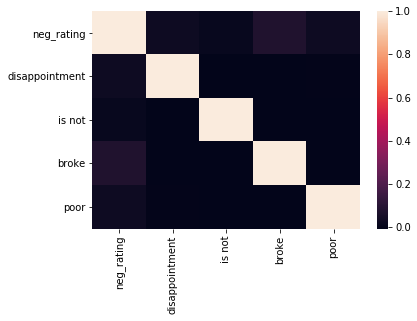

In [7]:
sns.heatmap(df.corr())
plt.show()    

In [8]:
data = df[keywords]
target = df['neg_rating']

In [9]:
#importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(data, target)
#storing the result in a new variable.
y_pred = bnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 491


In [10]:
a = list(y_pred==target)
Accuracy = (1-(a.count(False)/df.neg_rating.count()))*100
Accuracy 

50.9

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))
print ('This will show the counts for when a review was negative and we predicted negative, when a message was negative')
print   ('and we predicted positive,when a message was positive and we predicted negative, and when a message was positive and we predicted positive.')


[[498   2]
 [489  11]]
This will show the counts for when a review was negative and we predicted negative, when a message was negative
and we predicted positive,when a message was positive and we predicted negative, and when a message was positive and we predicted positive.


In [12]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb, data, target, cv=10))
 

[0.51 0.5  0.5  0.51 0.5  0.5  0.51 0.5  0.51 0.5 ]


## Test Classifiers

In [13]:
test_words = ['disappointment','is not','broke','poor','not','broken','waste','time and money']
neg_caps = []
for word in test_words:
    for review in df[df['neg_rating']==True].reviews:
        if word.upper() in review.split():
              
             neg_caps.append(word.upper())


In [14]:
neg_caps
 

['BROKE', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'NOT']

In [15]:
test_words = test_words+['NOT','BROKE']
 

In [16]:
for key in test_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.reviews.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [17]:
data = df[test_words]
target = df['neg_rating']

In [18]:
#importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(data, target)
#storing the result in a new variable.
y_pred = bnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 410


In [19]:
print(confusion_matrix(target, y_pred))
print(cross_val_score(bnb, data, target, cv=10))

[[488  12]
 [398 102]]
[0.58 0.62 0.6  0.58 0.58 0.53 0.61 0.58 0.62 0.57]


1. Do any of your classifiers seem to overfit?
<p>Yes. The classifiers that have several words and words that are the same but capitalized. Most likely because they are mre complicated and some of the same words are in the same review.
<p>2. Which seem to perform the best? Why?
<p>I could never get performance above 60%. But I feel like the iterations with fewer features perfomed the best. Im assuming less correlation between features.
<p>3. Which features seemed to be most impactful to performance?
<p>The words that were excluively found only in the negative reviews. 

In [28]:
from sklearn.model_selection import train_test_split
# Create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('Holdout: ' + str(bnb.fit(X_train, y_train).score(X_train, y_train)))
print('Sample: ' + str(bnb.fit(data, target).score(data, target)))


Holdout: 0.585
Sample: 0.59
